In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def slice_cens(x, k=50):
    # return 5 second slices that are reshaped appropriately
    indexes = np.array(
        [
            np.arange(i, i + k)
            for i in range(0, x.shape[1], k)
            if i + k < x.shape[1]
        ]
    )
    return np.transpose(x[:, indexes], [1, 0, 2])

def with_metadata(row):
    res = list(row)
    n = len(res)
    k = [(i+1)*5 for i in range(n)]
    return list(zip(k, res))

def explode_cens(df):
    df["_section"] = df.cens.apply(slice_cens).apply(with_metadata)
    df = df.explode("_section")
    df["seconds"] = df["_section"].apply(lambda x: x[0])
    df["snippet"] = df["_section"].apply(lambda x: x[1])
    return df.drop(columns=["_section"])


In [2]:
def slice_seconds(data, sample_rate, seconds=5, pad_seconds=0):
    # return 2d array of the original data
    n = len(data)
    k = sample_rate*seconds
    pad = sample_rate*pad_seconds
    indexes = np.array(
        [
            np.arange(i, i + k + pad)
            for i in range(0, n, k)
            if i + k + pad <= n
        ]
    )
    indexed = data[indexes]
    return list(zip((np.arange(len(indexed))+1)*5, indexed))

In [3]:
input_df = pd.read_csv("../data/input/train_soundscape_labels.csv")
cens_df = pd.read_pickle("../data/cens/train_soundscapes/data.pkl.gz")

In [11]:
cens_df["_snippet"] = cens_df[["name", "data", "sample_rate"]].apply(lambda x: slice_seconds(x.data, x.sample_rate), axis=1)
exploded = cens_df.explode("_snippet")
exploded["seconds"] = exploded["_snippet"].apply(lambda x: x[0])
exploded["snippet"] = exploded["_snippet"].apply(lambda x: x[1])
exploded["site"] = exploded.name.apply(lambda x: x.split("_")[1])
exploded["audio_id"] = exploded.name.apply(lambda x: x.split("_")[0]).astype(int)
tx_df = input_df.merge(exploded, on=["site", "audio_id", "seconds"])
tx_df["y"] = tx_df.birds.apply(lambda x: 0.0 if x == "nocall" else 1.0)
tx_df

,row_id,site,audio_id,seconds,birds,name,parent,data,sample_rate,cens,cens_sample_rate,path,_snippet,snippet,y
0,7019_COR_5,COR,7019,5,nocall,7019_COR_20190904,train_soundscapes,"[-0.074927814, -0.070623636, -0.012813405, -0....",22050,"[[0.29982088833602566, 0.2964565244514178, 0.2...",10,data/input/train_soundscapes/7019_COR_20190904...,"(5, [-0.074927814, -0.070623636, -0.012813405,...","[-0.074927814, -0.070623636, -0.012813405, -0....",0.0
1,7019_COR_10,COR,7019,10,nocall,7019_COR_20190904,train_soundscapes,"[-0.074927814, -0.070623636, -0.012813405, -0....",22050,"[[0.29982088833602566, 0.2964565244514178, 0.2...",10,data/input/train_soundscapes/7019_COR_20190904...,"(10, [0.012558174, -0.0062861964, -0.010699186...","[0.012558174, -0.0062861964, -0.0106991865, 0....",0.0
2,7019_COR_15,COR,7019,15,nocall,7019_COR_20190904,train_soundscapes,"[-0.074927814, -0.070623636, -0.012813405, -0....",22050,"[[0.29982088833602566, 0.2964565244514178, 0.2...",10,data/input/train_soundscapes/7019_COR_20190904...,"(15, [0.0211886, 0.05153161, 0.0547787, 0.0683...","[0.0211886, 0.05153161, 0.0547787, 0.06838079,...",0.0
3,7019_COR_20,COR,7019,20,nocall,7019_COR_20190904,train_soundscapes,"[-0.074927814, -0.070623636, -0.012813405, -0....",22050,"[[0.29982088833602566, 0.2964565244514178, 0.2...",10,data/input/train_soundscapes/7019_COR_20190904...,"(20, [-0.09674744, -0.12779698, -0.11827926, -...","[-0.09674744, -0.12779698, -0.11827926, -0.110...",0.0
4,7019_COR_25,COR,7019,25,nocall,7019_COR_20190904,train_soundscapes,"[-0.074927814, -0.070623636, -0.012813405, -0....",22050,"[[0.29982088833602566, 0.2964565244514178, 0.2...",10,data/input/train_soundscapes/7019_COR_20190904...,"(25, [0.059325323, 0.049653903, 0.06464528, 0....","[0.059325323, 0.049653903, 0.06464528, 0.06322...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,54955_SSW_580,SSW,54955,580,nocall,54955_SSW_20170617,train_soundscapes,"[0.11415207, 0.15958197, 0.122738324, 0.121970...",22050,"[[0.22879103798263076, 0.22964307854049798, 0....",10,data/input/train_soundscapes/54955_SSW_2017061...,"(580, [-0.03339911, -0.02001738, -0.017174277,...","[-0.03339911, -0.02001738, -0.017174277, -0.01...",0.0
2396,54955_SSW_585,SSW,54955,585,grycat,54955_SSW_20170617,train_soundscapes,"[0.11415207, 0.15958197, 0.122738324, 0.121970...",22050,"[[0.22879103798263076, 0.22964307854049798, 0....",10,data/input/train_soundscapes/54955_SSW_2017061...,"(585, [0.1398685, 0.14535491, 0.14392486, 0.14...","[0.1398685, 0.14535491, 0.14392486, 0.14465475...",1.0
2397,54955_SSW_590,SSW,54955,590,grycat,54955_SSW_20170617,train_soundscapes,"[0.11415207, 0.15958197, 0.122738324, 0.121970...",22050,"[[0.22879103798263076, 0.22964307854049798, 0....",10,data/input/train_soundscapes/54955_SSW_2017061...,"(590, [-0.008788381, -0.017808164, -0.02109720...","[-0.008788381, -0.017808164, -0.021097202, -0....",1.0
2398,54955_SSW_595,SSW,54955,595,nocall,54955_SSW_20170617,train_soundscapes,"[0.11415207, 0.15958197, 0.122738324, 0.121970...",22050,"[[0.22879103798263076, 0.22964307854049798, 0....",10,data/input/train_soundscapes/54955_SSW_2017061...,"(595, [0.056973755, 0.033190306, 0.017808143, ...","[0.056973755, 0.033190306, 0.017808143, 0.0071...",0.0


In [8]:
import IPython.display as ipd

for row in tx_df.sample(5).itertuples():
    print(row.birds)
    ipd.display(ipd.Audio(row.snippet, rate=row.sample_rate))

nocall


nocall


nocall


chswar


nocall


In [21]:
X = np.stack(tx_df.snippet.values)
y = tx_df.y.values

In [32]:
np.random.beta(0.4, 0.4, 10)

array([0.73095389, 0.09015121, 0.99798035, 0.86225353, 0.3647365 ,
       0.40067586, 0.66402106, 0.89843845, 0.98350266, 0.87539241])

In [40]:
def mixup(df, alpha=0.4):
    shuf = df.sample(frac=1).reset_index(drop=True)
    x1 = np.stack(df.snippet.values)
    x2 = np.stack(shuf.snippet.values)
    y1 = df.y.values
    y2 = shuf.y.values
    a = np.random.beta(alpha, alpha, (x1.shape[0], 1))
    return (
        a*x1+(1-a)*x2,
        (a.T*y1+(1-a.T)*y2).reshape(-1)
    )

In [41]:
X1, y1 = mixup(tx_df)
X1.shape, y1.shape, y1

((2400, 110250),
 (2400,),
 array([0.26562858, 0.87982132, 0.        , ..., 0.46626723, 0.        ,
        0.82458549]))

(array([1258.,   92.,   83.,   61.,   63.,   62.,   59.,   78.,   98.,
         546.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

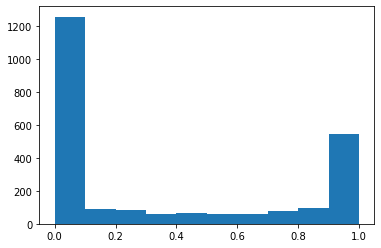

In [43]:
from matplotlib import pyplot as plt

plt.hist(y1)

In [53]:
sample_rate = tx_df.sample_rate.iloc[0]
indices = np.random.choice(np.arange(X1.shape[0]), 5)
for i in indices:
    print(y1[i])
    ipd.display(ipd.Audio(X1[i], rate=sample_rate))

0.0


0.0


0.0


0.6333704431492755


0.6559308240296065


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = np.stack(tx_df.snippet.values)
y = tx_df.y.values
X_train, X_test, y_train, y_test = train_test_split(X, y)
for _ in range(3):
    _X, _y = mixup(tx_df)
    X_train = np.append(X_train, _X, axis=0)
    y_train = np.append(y_train, _y)
X_train.shape, y_train.shape

((9000, 110250), (9000,))

(array([374.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 226.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

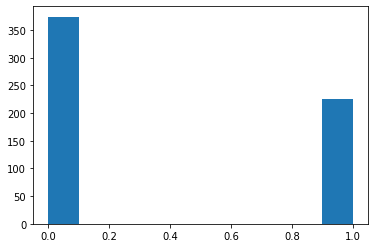

In [77]:
plt.hist(y_test)

TODO

Use simple CNN architecture

* cens 2 w/ smoothing
* cens 2 w/o smoothing
* cens 10 w/ smoothing
* cnes 10 w/0 smoothing
* cens 2 @ 36 bins (best of smoothing/no smoothing)
* mels (n_fft = sr // 10, hop_length = sr // 1e4), power to db

In [95]:
import librosa
from birdclef.utils import cens_per_sec
from multiprocessing import Pool
from tqdm.auto import tqdm
from functools import partial

In [96]:
X = np.stack(tx_df.snippet.values)
y = tx_df.y.values

convert = partial(
    librosa.feature.chroma_cens, 
    hop_length=cens_per_sec(sample_rate, 10), 
    n_chroma=12, 
    win_len_smooth=41
)
n = X.shape[0]
with Pool(8) as p:
    conv = list(tqdm(p.imap(convert, X), total=n))

  0%|          | 0/2400 [00:00<?, ?it/s]

(2400, 12, 51)

In [99]:
Xc = np.array(conv).reshape(n, -1)
Xc.shape

(2400, 612)

In [124]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(Xc, y)
clf = SVC().fit(X_train, y_train)
scores = cross_validate(clf, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc"])
df = pd.DataFrame(scores)
ipd.display(df)
df.describe()

,fit_time,score_time,test_accuracy,test_f1,test_roc_auc
0,0.560099,0.366004,0.666667,0.277108,0.718733
1,0.509011,0.378463,0.652778,0.384236,0.674907
2,0.486465,0.402693,0.641667,0.302703,0.633666
3,0.651552,0.399761,0.677778,0.355556,0.705078
4,0.733281,0.540414,0.683333,0.359551,0.683151


,fit_time,score_time,test_accuracy,test_f1,test_roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.588082,0.417467,0.664444,0.335831,0.683107
std,0.103044,0.070387,0.017280,0.044274,0.032648
min,0.486465,0.366004,0.641667,0.277108,0.633666
25%,0.509011,0.378463,0.652778,0.302703,0.674907
50%,0.560099,0.399761,0.666667,0.355556,0.683151
75%,0.651552,0.402693,0.677778,0.359551,0.705078
max,0.733281,0.540414,0.683333,0.384236,0.718733


In [131]:
params = {"C": [1, 5, 10]}
clf = GridSearchCV(SVC(), param_grid=params)
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(), param_grid={'C': [1, 5, 10]})

In [132]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.523970,0.086035,0.204443,0.028540,1,{'C': 1},0.666667,0.652778,0.641667,0.677778,0.683333,0.664444,0.015456,3
1,0.600674,0.050942,0.189568,0.005278,5,{'C': 5},0.680556,0.655556,0.627778,0.688889,0.702778,0.671111,0.026562,1
2,0.608671,0.048735,0.188641,0.014920,10,{'C': 10},0.675000,0.644444,0.644444,0.691667,0.672222,0.665556,0.018476,2


## pipelined

In [172]:
X = np.stack(tx_df.snippet.values)
y = tx_df.y.values

convert = partial(
    librosa.feature.chroma_cens, 
    hop_length=cens_per_sec(sample_rate, 10), 
    n_chroma=12, 
    win_len_smooth=41
)
n = X.shape[0]
with Pool(10) as p:
    conv = list(tqdm(p.imap(convert, X), total=n))

  0%|          | 0/2400 [00:00<?, ?it/s]

In [173]:
X_train, X_test, y_train, y_test = train_test_split(np.array(conv).reshape(n, -1), y)

params = {"C": [1, 5, 10]}
clf = GridSearchCV(SVC(), param_grid=params)
clf.fit(X_train, y_train)
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.472980,0.026890,0.176985,0.003878,1,{'C': 1},0.669444,0.647222,0.641667,0.661111,0.638889,0.651667,0.011733,1
1,0.482393,0.017155,0.177087,0.004302,5,{'C': 5},0.672222,0.644444,0.630556,0.633333,0.600000,0.636111,0.023307,2
2,0.549020,0.031159,0.169226,0.003214,10,{'C': 10},0.680556,0.625000,0.605556,0.641667,0.602778,0.631111,0.028458,3


In [135]:
X = np.stack(tx_df.snippet.values)
y = tx_df.y.values

convert = partial(
    librosa.feature.chroma_cens, 
    hop_length=cens_per_sec(sample_rate, 10), 
    n_chroma=12, 
    win_len_smooth=None
)
n = X.shape[0]
with Pool(10) as p:
    conv = list(tqdm(p.imap(convert, X), total=n))

  0%|          | 0/2400 [00:00<?, ?it/s]

In [136]:
X_train, X_test, y_train, y_test = train_test_split(np.array(conv).reshape(n, -1), y)

params = {"C": [1, 5, 10]}
clf = GridSearchCV(SVC(), param_grid=params)
clf.fit(X_train, y_train)
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.604769,0.047963,0.241912,0.006509,1,{'C': 1},0.669444,0.625000,0.655556,0.691667,0.663889,0.661111,0.021660,1
1,0.660853,0.043897,0.263756,0.012852,5,{'C': 5},0.661111,0.622222,0.652778,0.647222,0.658333,0.648333,0.013900,2
2,0.700903,0.073857,0.252724,0.015316,10,{'C': 10},0.655556,0.627778,0.652778,0.647222,0.652778,0.647222,0.010092,3


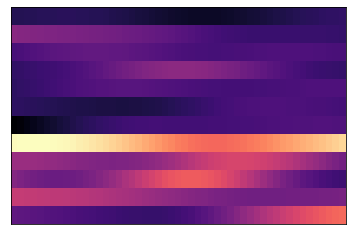

In [184]:
import librosa.display
i = np.where(y==1)[0][0]
librosa.display.specshow(conv[i])
plt.show()
ipd.Audio(X[i], rate=sample_rate)

In [137]:
X = np.stack(tx_df.snippet.values)
y = tx_df.y.values

convert = partial(
    librosa.feature.chroma_cens, 
    hop_length=cens_per_sec(sample_rate, 2), 
    n_chroma=12, 
    win_len_smooth=None
)
n = X.shape[0]
with Pool(10) as p:
    conv = list(tqdm(p.imap(convert, X), total=n))
    
X_train, X_test, y_train, y_test = train_test_split(np.array(conv).reshape(n, -1), y)

params = {"C": [1, 5, 10]}
clf = GridSearchCV(SVC(), param_grid=params)
clf.fit(X_train, y_train)
pd.DataFrame(clf.cv_results_)

  0%|          | 0/2400 [00:00<?, ?it/s]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.160383,0.001903,0.081854,0.002216,1,{'C': 1},0.652778,0.658333,0.641667,0.619444,0.619444,0.638333,0.016330,1
1,0.200539,0.000946,0.085063,0.001618,5,{'C': 5},0.630556,0.644444,0.608333,0.636111,0.591667,0.622222,0.019405,2
2,0.203410,0.000926,0.085203,0.001128,10,{'C': 10},0.625000,0.636111,0.586111,0.627778,0.572222,0.609444,0.025374,3


In [138]:
X = np.stack(tx_df.snippet.values)
y = tx_df.y.values

convert = partial(
    librosa.feature.chroma_cens, 
    hop_length=cens_per_sec(sample_rate, 2), 
    n_chroma=12, 
    win_len_smooth=4
)
n = X.shape[0]
with Pool(10) as p:
    conv = list(tqdm(p.imap(convert, X), total=n))
    
X_train, X_test, y_train, y_test = train_test_split(np.array(conv).reshape(n, -1), y)

params = {"C": [1, 5, 10]}
clf = GridSearchCV(SVC(), param_grid=params)
clf.fit(X_train, y_train)
pd.DataFrame(clf.cv_results_)

  0%|          | 0/2400 [00:00<?, ?it/s]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.154220,0.001803,0.073419,0.001055,1,{'C': 1},0.638889,0.655556,0.650000,0.652778,0.661111,0.651667,0.007370,1
1,0.209916,0.003036,0.076361,0.002924,5,{'C': 5},0.641667,0.655556,0.619444,0.636111,0.666667,0.643889,0.016235,2
2,0.235703,0.005904,0.076528,0.001237,10,{'C': 10},0.608333,0.622222,0.622222,0.633333,0.663889,0.630000,0.018708,3


In [145]:
X = np.stack(tx_df.snippet.values)
y = tx_df.y.values

convert = partial(
    librosa.feature.chroma_cens, 
    hop_length=cens_per_sec(sample_rate, 2), 
    n_chroma=12, 
    win_len_smooth=8
)
n = X.shape[0]
with Pool(10) as p:
    conv = list(tqdm(p.imap(convert, X), total=n))
    
X_train, X_test, y_train, y_test = train_test_split(np.array(conv).reshape(n, -1), y)

params = {"C": [1, 5, 10]}
clf = GridSearchCV(SVC(), param_grid=params)
clf.fit(X_train, y_train)
pd.DataFrame(clf.cv_results_)

  0%|          | 0/2400 [00:00<?, ?it/s]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.152353,0.003926,0.073006,0.001093,1,{'C': 1},0.677778,0.627778,0.641667,0.633333,0.641667,0.644444,0.017480,2
1,0.180010,0.002390,0.072657,0.002765,5,{'C': 5},0.691667,0.644444,0.647222,0.611111,0.636111,0.646111,0.026093,1
2,0.227067,0.004613,0.072283,0.000593,10,{'C': 10},0.666667,0.644444,0.619444,0.616667,0.636111,0.636667,0.018207,3


In [139]:
X = np.stack(tx_df.snippet.values)
y = tx_df.y.values

convert = partial(
    librosa.feature.chroma_cens, 
    hop_length=cens_per_sec(sample_rate, 8), 
    n_chroma=12, 
    win_len_smooth=None
)
n = X.shape[0]
with Pool(10) as p:
    conv = list(tqdm(p.imap(convert, X), total=n))
    
X_train, X_test, y_train, y_test = train_test_split(np.array(conv).reshape(n, -1), y)

params = {"C": [1, 5, 10]}
clf = GridSearchCV(SVC(), param_grid=params)
clf.fit(X_train, y_train)
pd.DataFrame(clf.cv_results_)

  0%|          | 0/2400 [00:00<?, ?it/s]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.435096,0.053327,0.206366,0.033348,1,{'C': 1},0.622222,0.652778,0.638889,0.630556,0.641667,0.637222,0.010334,1
1,0.501871,0.043470,0.203306,0.021991,5,{'C': 5},0.580556,0.608333,0.622222,0.616667,0.652778,0.616111,0.023267,2
2,0.531344,0.051700,0.225119,0.010091,10,{'C': 10},0.577778,0.605556,0.625000,0.616667,0.644444,0.613889,0.022083,3


In [140]:
X = np.stack(tx_df.snippet.values)
y = tx_df.y.values

convert = partial(
    librosa.feature.chroma_cens, 
    hop_length=cens_per_sec(sample_rate, 8), 
    n_chroma=12, 
    win_len_smooth=16
)
n = X.shape[0]
with Pool(10) as p:
    conv = list(tqdm(p.imap(convert, X), total=n))
    
X_train, X_test, y_train, y_test = train_test_split(np.array(conv).reshape(n, -1), y)

params = {"C": [1, 5, 10]}
clf = GridSearchCV(SVC(), param_grid=params)
clf.fit(X_train, y_train)
pd.DataFrame(clf.cv_results_)

  0%|          | 0/2400 [00:00<?, ?it/s]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.467558,0.026636,0.169086,0.011490,1,{'C': 1},0.622222,0.622222,0.627778,0.638889,0.641667,0.630556,0.008240,1
1,0.492629,0.014049,0.171466,0.008139,5,{'C': 5},0.605556,0.611111,0.633333,0.613889,0.627778,0.618333,0.010482,3
2,0.492746,0.005989,0.164329,0.005481,10,{'C': 10},0.627778,0.608333,0.633333,0.597222,0.641667,0.621667,0.016424,2


In [141]:
X = np.stack(tx_df.snippet.values)
y = tx_df.y.values

convert = partial(
    librosa.feature.chroma_cens, 
    hop_length=cens_per_sec(sample_rate, 8), 
    n_chroma=12, 
    win_len_smooth=4
)
n = X.shape[0]
with Pool(10) as p:
    conv = list(tqdm(p.imap(convert, X), total=n))
    
X_train, X_test, y_train, y_test = train_test_split(np.array(conv).reshape(n, -1), y)

params = {"C": [1, 5, 10]}
clf = GridSearchCV(SVC(), param_grid=params)
clf.fit(X_train, y_train)
pd.DataFrame(clf.cv_results_)

  0%|          | 0/2400 [00:00<?, ?it/s]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.466136,0.053546,0.182591,0.007229,1,{'C': 1},0.652778,0.638889,0.636111,0.630556,0.661111,0.643889,0.011304,1
1,0.511542,0.022262,0.198401,0.010990,5,{'C': 5},0.597222,0.597222,0.641667,0.630556,0.602778,0.613889,0.018592,3
2,0.591069,0.123033,0.198872,0.010642,10,{'C': 10},0.619444,0.597222,0.638889,0.616667,0.619444,0.618333,0.013217,2


In [142]:
X = np.stack(tx_df.snippet.values)
y = tx_df.y.values

convert = partial(
    librosa.feature.chroma_cens, 
    hop_length=cens_per_sec(sample_rate, 2), 
    n_chroma=36, 
    win_len_smooth=None
)
n = X.shape[0]
with Pool(10) as p:
    conv = list(tqdm(p.imap(convert, X), total=n))
    
X_train, X_test, y_train, y_test = train_test_split(np.array(conv).reshape(n, -1), y)

params = {"C": [1, 5, 10]}
clf = GridSearchCV(SVC(), param_grid=params)
clf.fit(X_train, y_train)
pd.DataFrame(clf.cv_results_)

  0%|          | 0/2400 [00:00<?, ?it/s]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.366138,0.034574,0.168312,0.003186,1,{'C': 1},0.663889,0.627778,0.633333,0.638889,0.644444,0.641667,0.012423,3
1,0.407332,0.014120,0.173146,0.006724,5,{'C': 5},0.633333,0.658333,0.633333,0.686111,0.677778,0.657778,0.021900,1
2,0.429557,0.022622,0.172757,0.009640,10,{'C': 10},0.636111,0.641667,0.641667,0.650000,0.680556,0.650000,0.015909,2


In [143]:
X = np.stack(tx_df.snippet.values)
y = tx_df.y.values

convert = partial(
    librosa.feature.chroma_cens, 
    hop_length=cens_per_sec(sample_rate, 2), 
    n_chroma=36, 
    win_len_smooth=4
)
n = X.shape[0]
with Pool(10) as p:
    conv = list(tqdm(p.imap(convert, X), total=n))
    
X_train, X_test, y_train, y_test = train_test_split(np.array(conv).reshape(n, -1), y)

params = {"C": [1, 5, 10]}
clf = GridSearchCV(SVC(), param_grid=params)
clf.fit(X_train, y_train)
pd.DataFrame(clf.cv_results_)

  0%|          | 0/2400 [00:00<?, ?it/s]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.314838,0.007773,0.147809,0.009851,1,{'C': 1},0.666667,0.663889,0.644444,0.652778,0.661111,0.657778,0.008127,1
1,0.383418,0.015194,0.154479,0.003301,5,{'C': 5},0.641667,0.641667,0.608333,0.641667,0.647222,0.636111,0.014055,2
2,0.383592,0.010221,0.157970,0.008415,10,{'C': 10},0.625000,0.616667,0.586111,0.641667,0.627778,0.619444,0.018509,3


In [185]:
X = np.stack(tx_df.snippet.values)
y = tx_df.y.values

convert = partial(
    librosa.feature.chroma_cens, 
    hop_length=cens_per_sec(sample_rate, 5), 
    n_chroma=36, 
    win_len_smooth=None
)
n = X.shape[0]
with Pool(10) as p:
    conv = list(tqdm(p.imap(convert, X), total=n))
    
X_train, X_test, y_train, y_test = train_test_split(np.array(conv).reshape(n, -1), y)

params = {"C": [1, 5, 10]}
clf = GridSearchCV(SVC(), param_grid=params)
clf.fit(X_train, y_train)
pd.DataFrame(clf.cv_results_)

  0%|          | 0/2400 [00:00<?, ?it/s]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.074474,0.025233,0.384551,0.003893,1,{'C': 1},0.655556,0.663889,0.636111,0.663889,0.638889,0.651667,0.011993,1
1,1.201834,0.010303,0.406313,0.006154,5,{'C': 5},0.636111,0.622222,0.663889,0.625000,0.625000,0.634444,0.015476,2
2,1.210503,0.027913,0.410036,0.005281,10,{'C': 10},0.627778,0.633333,0.663889,0.627778,0.619444,0.634444,0.015376,2


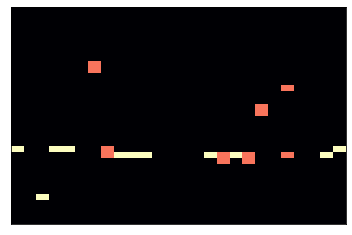

In [186]:
import librosa.display
i = np.where(y==1)[0][0]
librosa.display.specshow(conv[i])
plt.show()
ipd.Audio(X[i], rate=sample_rate)

In [168]:
X = np.stack(tx_df.snippet.values)
y = tx_df.y.values

convert = partial(
    librosa.feature.melspectrogram,
    sr=sample_rate,
    n_fft = 16,
    hop_length=cens_per_sec(sample_rate, 8), 
)
n = X.shape[0]
with Pool(8) as p:
    conv = list(tqdm(p.imap(convert, X), total=n))
    
X_train, X_test, y_train, y_test = train_test_split(np.array(conv).reshape(n, -1), y)

  0%|          | 0/2400 [00:00<?, ?it/s]

In [169]:
conv[0].shape

(128, 41)

In [170]:
X_train.shape

(1800, 5248)

In [171]:
params = {"C": [1, 5, 10]}
clf = GridSearchCV(SVC(), param_grid=params)
clf.fit(X_train, y_train)
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.802158,0.280910,2.041680,0.058666,1,{'C': 1},0.636111,0.633333,0.638889,0.630556,0.627778,0.633333,0.003928,1
1,6.012812,0.166299,2.167955,0.059544,5,{'C': 5},0.630556,0.641667,0.641667,0.597222,0.608333,0.623889,0.018053,2
2,5.908441,0.189664,2.146979,0.077685,10,{'C': 10},0.622222,0.644444,0.608333,0.594444,0.611111,0.616111,0.016704,3


In [152]:
from sklearn.metrics import f1_score, accuracy_score


accuracy_score(np.zeros(y.shape[0]), y)

0.6370833333333333